refer to https://lp-tech.net/articles/0QUUd

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(10) # raw train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


- total 891
- missing data
  - Age (714/891)
  - Cabin (204/891)
  - Embarked (889/891)

In [377]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# replace strings with numbers

In [378]:
train = train.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)
test = test.replace("male",0).replace("female",1).replace("S",0).replace("C",1).replace("Q",2)

# fill N/A data by mean

In [379]:
train["Age"].fillna(train.Age.mean(), inplace=True)
train["Embarked"].fillna(train.Embarked.mean(), inplace=True) #平均で埋めていいの？
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


# Classify Name

In [380]:
#pd.set_option("display.max_rows", 1000)
combine1 = [train]

for train in combine1:
    train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False)
#print(train['Salutation'])
tmp = train['Salutation'].value_counts()
print(tmp)

Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Planke           3
Impe             3
Gordon           2
Major            2
Col              2
Mlle             2
Melkebeke        1
the              1
Shawah           1
Jonkheer         1
Don              1
Pelsmaeker       1
Cruyssen         1
Mulder           1
Billiard         1
der              1
Messemaeker      1
Velde            1
Walle            1
Capt             1
Mme              1
Carlo            1
Steen            1
Ms               1
Name: Salutation, dtype: int64


In [381]:
combine1 = [train]

for train in combine1:
    train['Salutation'] = train.Name.str.extract(' ([A-Za-z]+).', expand=False)
for train in combine1:
    train['Salutation'] = train['Salutation'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    train['Salutation'] = train['Salutation'].replace('Mlle', 'Miss')
    train['Salutation'] = train['Salutation'].replace('Ms', 'Miss')
    train['Salutation'] = train['Salutation'].replace('Mme', 'Mrs')
    del train['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 
for train in combine1: 
    train['Salutation'] = train['Salutation'].map(Salutation_mapping) 
    train['Salutation'] = train['Salutation'].fillna(0)

for train in combine1: 
    train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])
    train['Ticket_Lett'] = train['Ticket_Lett'].apply(lambda x: str(x)) 
    train['Ticket_Lett'] = np.where((train['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), train['Ticket_Lett'], np.where((train['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0')) 
    train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x)) 
    del train['Ticket'] 
train['Ticket_Lett']=train['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3)

for train in combine1: 
    train['Cabin_Lett'] = train['Cabin'].apply(lambda x: str(x)[0]) 
    train['Cabin_Lett'] = train['Cabin_Lett'].apply(lambda x: str(x)) 
    train['Cabin_Lett'] = np.where((train['Cabin_Lett']).isin([ 'F', 'E', 'D', 'C', 'B', 'A']),train['Cabin_Lett'], np.where((train['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']), '0','0'))
    del train['Cabin'] 
train['Cabin_Lett']=train['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1)

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
for train in combine1:
    train['IsAlone'] = 0
    train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,1,0,3,0,22.000000,1,0,7.2500,0.0,1.0,3,9,0,2,0
1,2,1,1,1,38.000000,1,0,71.2833,1.0,3.0,0,8,1,2,0
2,3,1,3,1,26.000000,0,0,7.9250,0.0,2.0,3,16,0,1,1
3,4,1,1,1,35.000000,1,0,53.1000,0.0,3.0,1,6,1,2,0
4,5,0,3,0,35.000000,0,0,8.0500,0.0,1.0,3,6,0,1,1
5,6,0,3,0,29.699118,0,0,8.4583,2.0,1.0,3,6,0,1,1
6,7,0,1,0,54.000000,0,0,51.8625,0.0,1.0,1,5,2,1,1
7,8,0,3,0,2.000000,3,1,21.0750,0.0,4.0,3,6,0,5,0
8,9,1,3,1,27.000000,0,2,11.1333,0.0,3.0,3,6,0,3,0
9,10,1,2,1,14.000000,1,0,30.0708,1.0,3.0,2,6,0,2,0


In [340]:
train_data = train.values
xs = train_data[:, 2:] # Pclass以降の変数
y  = train_data[:, 1]  # 正解データ

# testデータ加工

In [341]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [342]:
test["Age"].fillna(train.Age.mean(), inplace=True)
test["Fare"].fillna(train.Fare.mean(), inplace=True)

combine = [test]
for test in combine:
    test['Salutation'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
for test in combine:
    test['Salutation'] = test['Salutation'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    test['Salutation'] = test['Salutation'].replace('Mlle', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Ms', 'Miss')
    test['Salutation'] = test['Salutation'].replace('Mme', 'Mrs')
    del test['Name']
Salutation_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for test in combine:
    test['Salutation'] = test['Salutation'].map(Salutation_mapping)
    test['Salutation'] = test['Salutation'].fillna(0)

for test in combine:
        test['Ticket_Lett'] = test['Ticket'].apply(lambda x: str(x)[0])
        test['Ticket_Lett'] = test['Ticket_Lett'].apply(lambda x: str(x))
        test['Ticket_Lett'] = np.where((test['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), test['Ticket_Lett'],
                                   np.where((test['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0', '0'))
        test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
        del test['Ticket']
test['Ticket_Lett']=test['Ticket_Lett'].replace("1",1).replace("2",2).replace("3",3).replace("0",0).replace("S",3).replace("P",0).replace("C",3).replace("A",3) 

for test in combine:
        test['Cabin_Lett'] = test['Cabin'].apply(lambda x: str(x)[0])
        test['Cabin_Lett'] = test['Cabin_Lett'].apply(lambda x: str(x))
        test['Cabin_Lett'] = np.where((test['Cabin_Lett']).isin(['T', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']),test['Cabin_Lett'],
                                   np.where((test['Cabin_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            '0','0'))        
        del test['Cabin']
test['Cabin_Lett']=test['Cabin_Lett'].replace("A",1).replace("B",2).replace("C",1).replace("0",0).replace("D",2).replace("E",2).replace("F",1).replace("G",1) 

test["FamilySize"] = train["SibSp"] + train["Parch"] + 1

for test in combine:
    test['IsAlone'] = 0
    test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    
test_data = test.values
xs_test = test_data[:, 1:]

test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Salutation,Ticket_Lett,Ticket_Len,Cabin_Lett,FamilySize,IsAlone
0,892,3,0,34.5,0,0,7.8292,2,1,3,6,0,2,0
1,893,3,1,47.0,1,0,7.0000,0,3,3,6,0,2,0
2,894,2,0,62.0,0,0,9.6875,2,1,2,6,0,1,1
3,895,3,0,27.0,0,0,8.6625,0,1,3,6,0,2,0
4,896,3,1,22.0,1,1,12.2875,0,3,3,7,0,1,1


# 機械学習
## ランダムフォレストを利用

In [343]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier()
random_forest.fit(xs, y) # xs : Pclass以降の変数、 y: Survived
Y_pred = random_forest.predict(xs_test)

import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## ランダムフォレストのパラメータをチューニング

In [344]:
random_forest=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=15,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=4,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
random_forest.fit(xs, y) # xs : Pclass以降の変数、 y: Survived
Y_pred = random_forest.predict(xs_test)

import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), Y_pred.astype(int)):
        writer.writerow([pid, survived])

# データ分析
性別によってどれほど生存に違いが出たか?
0が男性、1が女性
女性の生存率が高い。

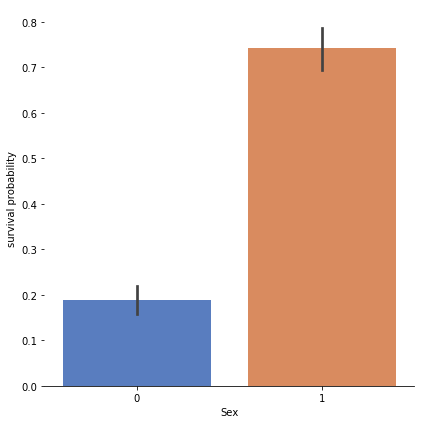

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(x="Sex", y="Survived",  data=train,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

そして男性の人数がかなり多い

乗組員に男性が多かったから? <= 全てにPclassあるので乗組員は含まれていない

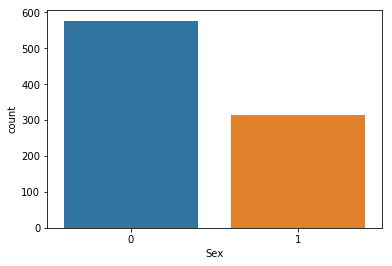

In [346]:
g = sns.countplot(x='Sex', data=train)

乗っていた等級による生存率

等級がいい順に生存率が高い


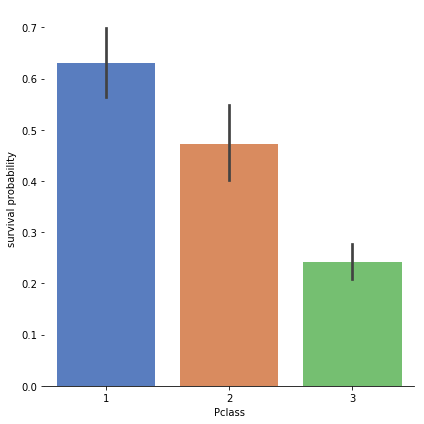

In [347]:
g = sns.catplot(x="Pclass",y="Survived",data=train,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

等級と性別を複合した時の生存率

1等と2等の女性の生存率が高く、2等と3等の男性の生存率が低いです。

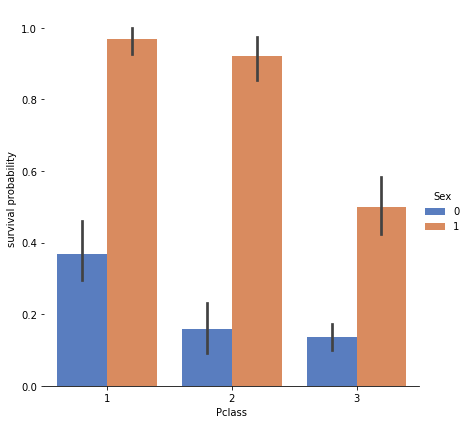

In [348]:
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

敬称による生存率

"others" : 0, "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5

1のMrは大人の男性　-> 生存率が少ない

2と3はMissとMrsなので女性 -> 生存率が高い

4はMaster、青年や若い男性

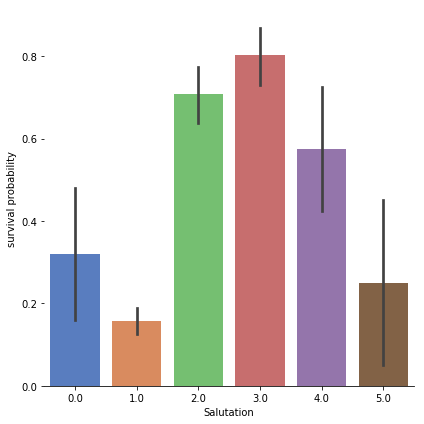

In [349]:
g = sns.catplot(x="Salutation", y="Survived",  data=train,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

データの生存率の相関

- 性別(Sex,Salutation)による相関、属している社会階級つまりお金をどれだけ持っているか(Pclass,Fare)に対する相関が高い
- Cabin_LettとTicket_Lettの相関も高い <= 社会的地位？
- 他にはIsAloneも相関が高い

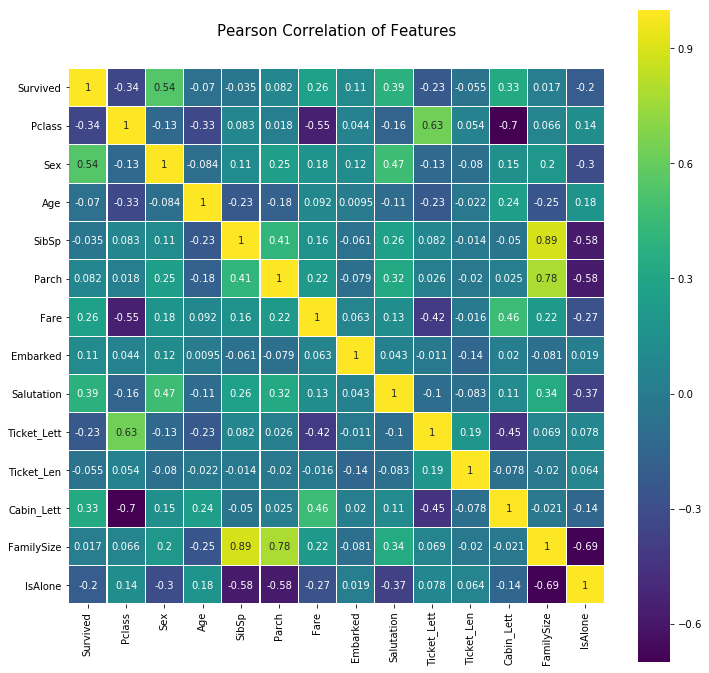

In [350]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
del train['PassengerId']
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

一緒に乗船した人数による生存率

一人で乗っていた人が多い

1人か5人以上で乗っていると生存率が悪い　<= 大家族であると当然お金もたくさんかかる.3等に乗った人が多い.一人の方々も3等が多い。3等なので救出の優先度も低い

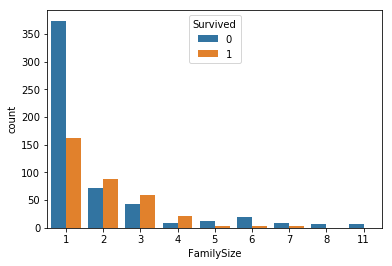

In [351]:
sns.countplot(x='FamilySize', data = train, hue = 'Survived')

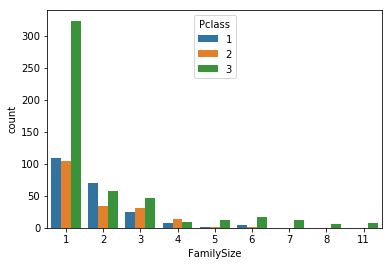

In [352]:
sns.countplot(x='FamilySize', data = train,hue = 'Pclass')

乗船場所による生存率の違い

タイタニックの航路はイギリスのサウサンプトン→フランスのシェルブール→アイルランドのクイーンズタウンの順番

シェルブールから乗った人の生存率が高い　＜＝1等に乗った人の割合が高かった

クイーンズタウンから乗った人は3等ばかりなのに生存率が少し高い　＜＝　男女比？

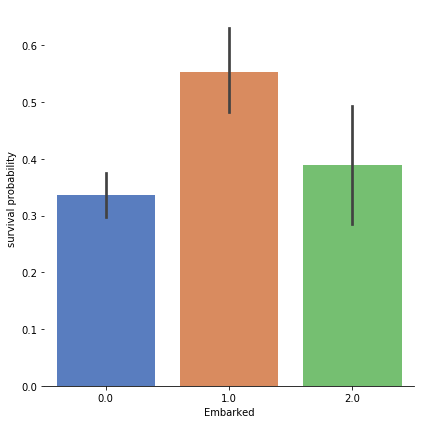

In [353]:
t=pd.read_csv("train.csv").replace("S",0).replace("C",1).replace("Q",2)
train['Embarked']= t['Embarked']
g = sns.catplot(x="Embarked", y="Survived",  data=train,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

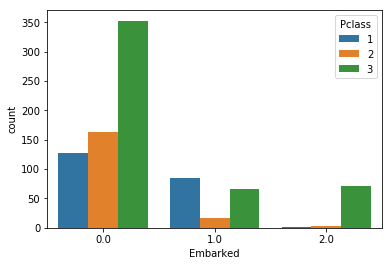

In [354]:
g = sns.countplot(x='Embarked', data = train,hue = 'Pclass')

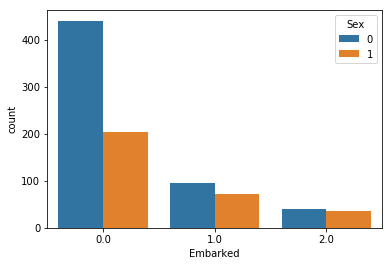

In [355]:
sns.countplot(x='Embarked', data = train,hue = 'Sex')

年齢による違い

10代後半から30代ほどまでは死亡率が高い

子供の死亡率は低い

15歳より上だとほとんど成人とみなされていた

老人の死亡率も高い

<Figure size 432x288 with 0 Axes>

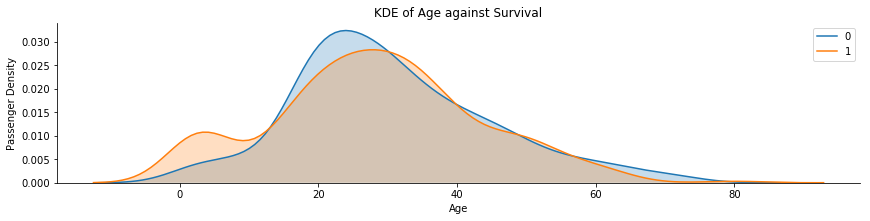

In [356]:
plt.figure()
sns.FacetGrid(data=t, hue="Survived", aspect=4).map(sns.kdeplot, "Age", shade=True)
plt.ylabel('Passenger Density')
plt.title('KDE of Age against Survival')
plt.legend()

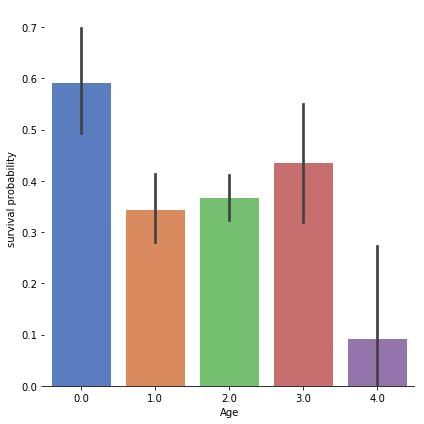

In [357]:
for t in combine1: 
    t.loc[ t['Age'] <= 15, 'Age'] = 0
    t.loc[(t['Age'] > 15) & (t['Age'] <= 25), 'Age'] = 1
    t.loc[(t['Age'] > 25) & (t['Age'] <= 48), 'Age'] = 2
    t.loc[(t['Age'] > 48) & (t['Age'] <= 64), 'Age'] = 3
    t.loc[ t['Age'] > 64, 'Age'] =4
g = sns.catplot(x="Age", y="Survived",  data=t,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

男女比と生存の数がほぼ一緒

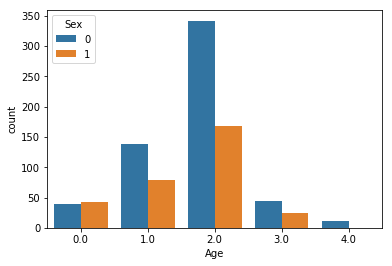

In [358]:
g = sns.countplot(x='Age', data = t,hue = 'Sex')

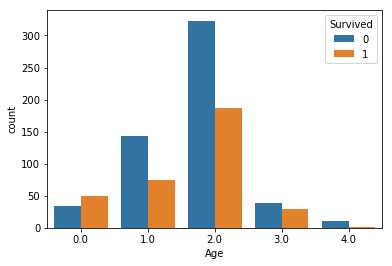

In [359]:
sns.countplot(x='Age', data = t,hue = 'Survived')